In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/content/drive/MyDrive/데이콘/전기차 가격 예측 해커톤/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이콘/전기차 가격 예측 해커톤/test.csv')

# EDA

In [ ]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [ ]:
test.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        846 non-null    object 
 1   제조사       846 non-null    object 
 2   모델        846 non-null    object 
 3   차량상태      846 non-null    object 
 4   배터리용량     542 non-null    float64
 5   구동방식      846 non-null    object 
 6   주행거리(km)  846 non-null    int64  
 7   보증기간(년)   846 non-null    int64  
 8   사고이력      846 non-null    object 
 9   연식(년)     846 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 66.2+ KB


In [ ]:
train.describe()

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
count,4786.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,69.397187,44287.979458,4.960918,0.222489,62.331949
std,15.283635,55204.064386,3.155342,0.569232,36.646759
min,46.000000,3.000000,0.000000,0.000000,9.000000
25%,56.359000,5465.000000,2.000000,0.000000,34.390000
50%,68.125000,17331.000000,5.000000,0.000000,56.000000
75%,78.227000,61252.000000,8.000000,0.000000,80.050000
max,99.800000,199827.000000,10.000000,2.000000,161.090000


In [ ]:
train.describe(include='O')

,ID,제조사,모델,차량상태,구동방식,사고이력
count,7497,7497,7497,7497,7497,7497
unique,7497,7,21,3,3,2
top,TRAIN_0000,H사,ID4,Brand New,AWD,No
freq,1,1237,605,3380,5167,7154


In [ ]:
train.isnull().sum()

,0
ID,0
제조사,0
모델,0
차량상태,0
배터리용량,2711
구동방식,0
주행거리(km),0
보증기간(년),0
사고이력,0
연식(년),0


In [ ]:
train['모델'].value_counts()

,count
모델,
ID4,605
i5,414
Niro,398
Soul,397
i3,388
RSeTGT,385
eT,379
ION6,379
Q4eT,378


In [ ]:
# print(train[train['모델']=='Niro']['가격(백만원)'].mean())
# print(train[train['모델']=='Niro']['가격(백만원)'].median())
q3 = train[train['모델']=='EV6']['가격(백만원)'].quantile(.75)
q1 = train[train['모델']=='EV6']['가격(백만원)'].quantile(.25)
iqr = q3 -q1
da= train[(train['모델']=='EV6')]
da[(da['가격(백만원)'] >= q3 + iqr*1.5) | (da['가격(백만원)'] <= q1 - iqr*1.5)]

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)


In [ ]:
# 전체 가격에 대한 이상치 진행시 특정 모델 전체가 걸림
# 모델, 연식, 차량 상태별 이상치 탐색(이상치 제거 후 모델학습 결과 test 데이터 예측력 감소)
# models = list(set(train['모델'].tolist()))
# status_list = list(set(train['차량상태'].tolist()))
# for name in models:
#   for year in range(0,3):
#     for status in status_list:
#       q3 = train[(train['모델']==name)&(train['연식(년)']==year)&(train['차량상태']==status)]['가격(백만원)'].quantile(.75)
#       q1 = train[(train['모델']==name)&(train['연식(년)']==year)&(train['차량상태']==status)]['가격(백만원)'].quantile(.25)
#       iqr = q3 -q1
#       da= train[(train['모델']==name)&(train['연식(년)']==year)&(train['차량상태']==status)]
#       drop_index = da[(da['가격(백만원)'] >= q3 + iqr*1.5) | (da['가격(백만원)'] <= q1 - iqr*1.5)].index
#       train = train.drop(index=drop_index)

In [ ]:
name = 'ION6'
year = 0
status = 'Brand New'
q3 = train[(train['모델']==name)&(train['연식(년)']==year)&(train['차량상태']==status)]['가격(백만원)'].quantile(.75)
q1 = train[(train['모델']==name)&(train['연식(년)']==year)&(train['차량상태']==status)]['가격(백만원)'].quantile(.25)
iqr = q3 -q1
print(train[(train['모델']==name)&(train['연식(년)']==year)&(train['차량상태']==status)]['가격(백만원)'].mean())
da[(da['가격(백만원)'] >= q3 + iqr*1.5) | (da['가격(백만원)'] <= q1 - iqr*1.5)]

38.76536312849162


,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
36,TRAIN_0036,K사,EV6,Brand New,NaN,AWD,2619,10,No,0,48.47
90,TRAIN_0090,K사,EV6,Brand New,NaN,FWD,847,10,No,0,48.95
99,TRAIN_0099,K사,EV6,Brand New,NaN,FWD,2922,9,No,0,40.86
110,TRAIN_0110,K사,EV6,Brand New,NaN,FWD,26,10,No,0,48.83
172,TRAIN_0172,K사,EV6,Brand New,NaN,FWD,7866,9,No,0,41.55
...,...,...,...,...,...,...,...,...,...,...,...
7428,TRAIN_7428,K사,EV6,Brand New,NaN,AWD,9413,9,No,0,40.93
7438,TRAIN_7438,K사,EV6,Brand New,NaN,FWD,7578,9,No,0,41.67
7471,TRAIN_7471,K사,EV6,Brand New,NaN,FWD,3691,9,No,0,39.92
7475,TRAIN_7475,K사,EV6,Brand New,90.0,AWD,3009,9,No,0,41.99


In [ ]:
test[(test['모델']=='Niro') & (test['연식(년)']==0)]

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
9,TEST_009,K사,Niro,Brand New,90.000,AWD,8496,9,No,0
36,TEST_036,K사,Niro,Brand New,NaN,AWD,9976,10,No,0
46,TEST_046,K사,Niro,Brand New,NaN,AWD,8485,10,No,0
80,TEST_080,K사,Niro,Pre-Owned,46.000,FWD,63021,1,Yes,0
128,TEST_128,K사,Niro,Nearly New,56.000,FWD,19855,6,No,0
132,TEST_132,K사,Niro,Brand New,NaN,FWD,6547,9,No,0
134,TEST_134,K사,Niro,Brand New,NaN,FWD,1420,10,No,0
140,TEST_140,K사,Niro,Pre-Owned,48.093,FWD,167659,3,No,0
144,TEST_144,K사,Niro,Brand New,NaN,FWD,728,10,No,0
261,TEST_261,K사,Niro,Pre-Owned,46.000,FWD,122954,1,No,0


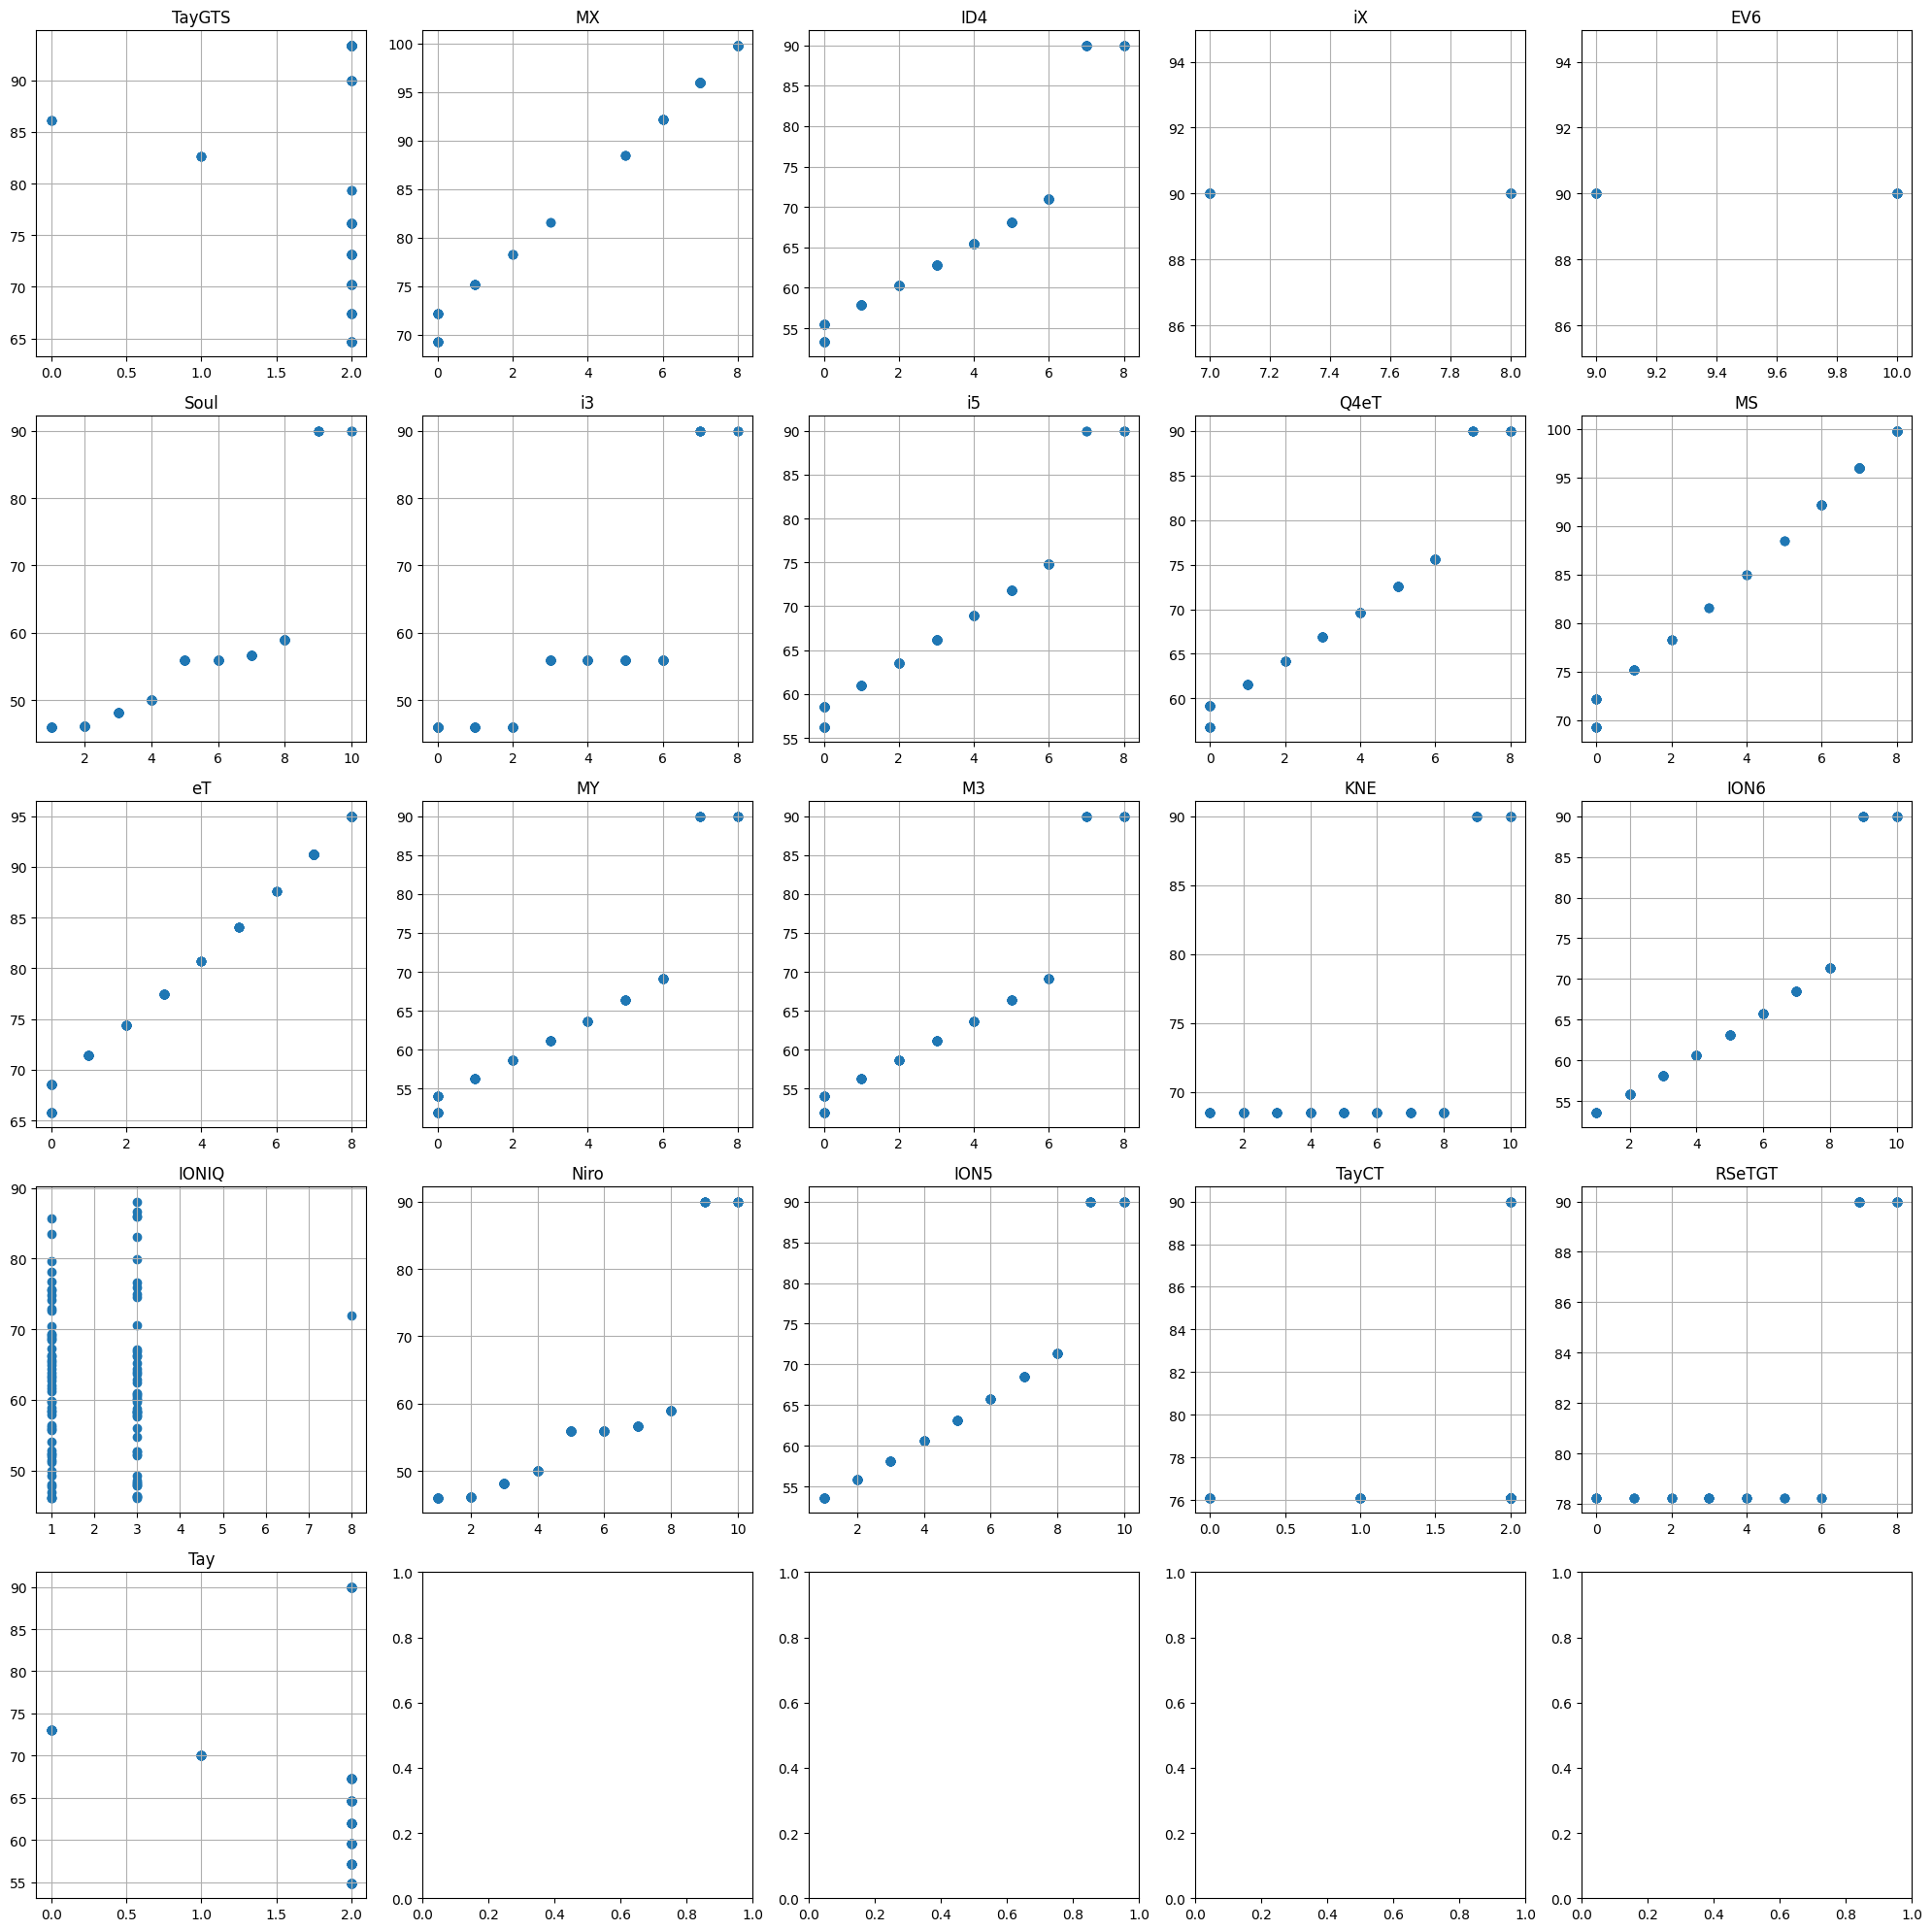

In [ ]:
models = ['TayGTS', 'MX', 'ID4', 'iX', 'EV6', 'Soul', 'i3', 'i5', 'Q4eT', 'MS', 'eT', 'MY', 'M3', 'KNE', 'ION6', 'IONIQ', 'Niro', 'ION5', 'TayCT', 'RSeTGT', 'Tay']
train_drop = train.dropna()

# 5행 5열의 서브플롯 생성
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = axes.flatten()

# 각각의 모델에 대해 산점도 그리기
for i, model in enumerate(models):
    ax = axes[i]
    model_data = train_drop[train_drop['모델'] == model]
    ax.scatter(model_data['보증기간(년)'], model_data['배터리용량'])
    ax.set_title(f'{model}')
    ax.grid(True)

# 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()

In [ ]:
# 수치형 데이터만 선택
numeric_df = train.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

correlation_matrix

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
배터리용량,1.000000,-0.576538,0.558242,-0.021845,0.431668
주행거리(km),-0.576538,1.000000,-0.664071,-0.089586,-0.035488
보증기간(년),0.558242,-0.664071,1.000000,0.035294,-0.349962
연식(년),-0.021845,-0.089586,0.035294,1.000000,-0.058455
가격(백만원),0.431668,-0.035488,-0.349962,-0.058455,1.000000


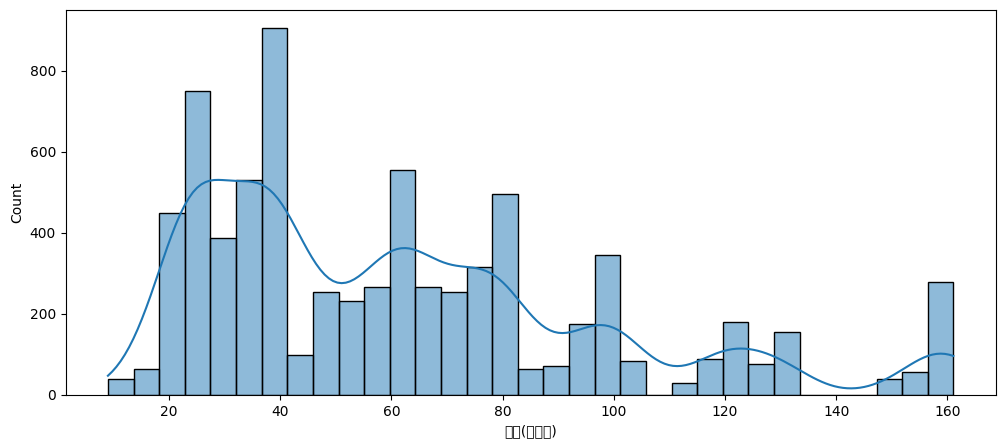

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data = train['가격(백만원)'], kde=True)
plt.show() # 로그스케일 필요

[Text(0.5, 1.0, 'Squrt Transformed Data')]

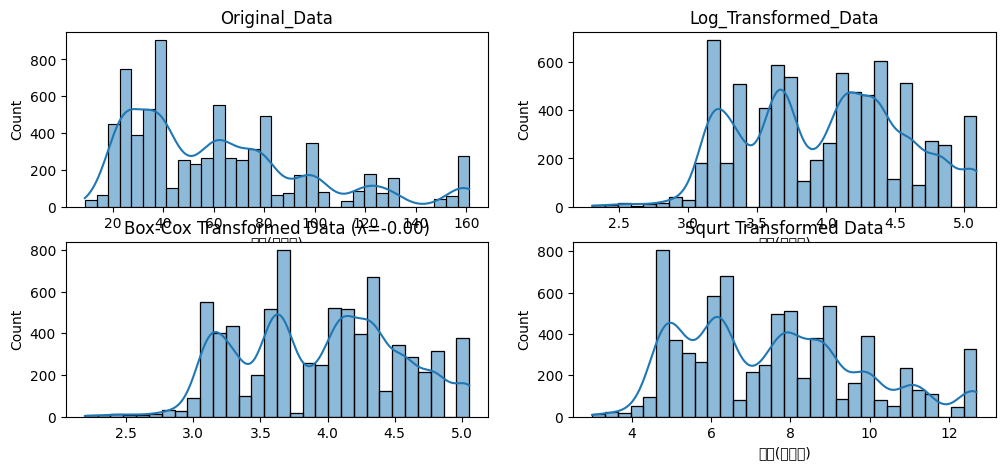

In [ ]:
from scipy.stats import boxcox
fig, axes = plt.subplots(2,2, figsize=(12,5))

log_transformed = np.log(train['가격(백만원)'] + 1)

boxcox_transformed, lambda_ = boxcox(train['가격(백만원)'])

squared_transformed = np.sqrt(train['가격(백만원)'])

sns.histplot(data = train['가격(백만원)'], kde=True, ax=axes[0,0]).set(title='Original_Data')
sns.histplot(data=log_transformed, bins=30, kde=True, ax=axes[0,1]).set(title='Log_Transformed_Data')
sns.histplot(boxcox_transformed, bins=30, kde=True, ax=axes[1,0]).set(title=f'Box-Cox Transformed Data (λ={lambda_:.2f})')
sns.histplot(squared_transformed, bins=30, kde=True, ax=axes[1,1]).set(title='Squrt Transformed Data')

In [ ]:
target_mean = train['가격(백만원)'].mean()
target_median = train['가격(백만원)'].median()
Q3 = train['가격(백만원)'].quantile(.75)
Q1 = train['가격(백만원)'].quantile(.25)
IQR = Q3 - Q1
print('평균:', target_mean)
print('중앙값:', target_median)
print('3분위수:', Q3)
print('1분위수:', Q1)
print('IQR:', IQR)
train[(train['가격(백만원)'] >= Q3+IQR*1.5) | (train['가격(백만원)'] <= Q1 - IQR * 1.5)]['모델'].value_counts()

평균: 62.331948779511805
중앙값: 56.0
3분위수: 80.05
1분위수: 34.39
IQR: 45.66


,count
모델,
TayGTS,375


# 전처리

In [ ]:
# 타겟 데이터 분리
target = train.pop('가격(백만원)')
#target_transformed = np.log(target + 1)

In [ ]:
# 결측치 0로 대체
train['배터리용량'] = train['배터리용량'].fillna(0)
test['배터리용량'] = test['배터리용량'].fillna(0)

In [ ]:
# 컬럼명 변경, ID 제거
df = pd.concat([train,test])
df.rename(columns={'주행거리(km)':'주행거리', '보증기간(년)':'보증기간', '연식(년)':'연식'}, inplace=True)
df = df.drop(['ID'], axis=1)

In [ ]:
# 레이블인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = list(df.columns[df.dtypes=='object'])
for col in cols:
  df[col] = le.fit_transform(df[col])

train = df.iloc[:len(train)]
test = df.iloc[len(train):]
print(train.shape, test.shape)

(7497, 9) (846, 9)


In [ ]:
# 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)
print(train.shape, test.shape)

(7497, 9) (846, 9)


In [ ]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, target, random_state=0, test_size=0.3)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

(5247, 9) (2250, 9) (5247,) (2250,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import root_mean_squared_error
import lightgbm as lgb
import xgboost as xgb
xgbm = xgb.XGBRegressor(random_state=0)
lgbm = lgb.LGBMRegressor(random_state=0, verbose=-1)
rf = RandomForestRegressor(random_state=0)
etr = ExtraTreesRegressor(random_state=0)
model_list = [etr, rf, lgbm, xgbm]
for md in model_list:
  md.fit(X_tr, y_tr)
  y_pred = md.predict(X_val)
  rmse = root_mean_squared_error(y_val, y_pred)
  print('RMSE:', rmse)
# xgbm.fit(X_tr, y_tr)
# y_pred = xgbm.predict(X_val)
# rmse = root_mean_squared_error(y_val, y_pred)
# print('RMSE:', rmse)


RMSE: 1.519580067085554
RMSE: 1.4238925655083492
RMSE: 1.3194729544637898
RMSE: 1.387161836623573


In [ ]:
# 예측 및 저장
pred = xgbm.predict(test)
#pred_transformed = np.exp(pred) - 1
submit = pd.DataFrame({"ID": range(0, 846), '가격(백만원)': pred})
submit['ID'] = [f"TEST_{i:03}" for i in range(0, 846)]
submit.to_csv('xgb.csv', index=False)

In [ ]:
pd.read_csv('xgb.csv')

,ID,가격(백만원)
0,TEST_000,130.332120
1,TEST_001,79.770836
2,TEST_002,65.410770
3,TEST_003,34.825466
4,TEST_004,48.084827
...,...,...
841,TEST_841,151.415760
842,TEST_842,38.650673
843,TEST_843,38.971653
844,TEST_844,58.893910
